In [79]:
import indicoio, json, re
from urlextract import URLExtract
import numpy as np
import matplotlib.pyplot as plt
import datetime




In [80]:
indicoio.config.api_key = 'a67ce4f377c965110a656e8587488294'


In [81]:
with open('parkland.json', 'r') as myfile:
    data = json.loads(myfile.read())



In [82]:
count = 0
for x in data['comments']:
    count += 1

print("Number of comments in our dataset")
print(count)
    

Number of comments in our dataset
50500


In [96]:

    
extractor = URLExtract()

timestamp = []
body_text = []


num = 0
for x in data['comments']:
    num += 1
    
    
    # TEXT CLEANING
    input_str = data['comments'][x]['body'].lower() # all letters become lowercase    
    url = extractor.find_urls(input_str)          # extracts and removes url
    if(len(url) != 0):
        input_str = input_str.replace(url[0],'')

    input_str = re.sub(r'\d+', '', input_str)     # removes numbers
    input_str = input_str.strip()                 # removes whitespace
    input_str = re.sub(r'[^\w\s]','',input_str)   # removes punctuation
    input_str = input_str.replace('\n','')        # removes '/n'
    

    
    if( 'timestamp' in data['comments'][x] and input_str):
        body_text.append(input_str)
        timestamp.append(data['comments'][x]['timestamp'])

    
    if(num == 10000):
        break
    





        
        






In [97]:
print(len(timestamp))


9950


In [98]:
political = []
political = indicoio.political(body_text)




In [ ]:
sentiment = []
sentiment = indicoio.sentiment(body_text)


In [100]:
# Parsed the timestamp to create a list of datatime objects

from datetime import datetime


time = []

for x in timestamp:
    parsed_date = datetime.utcfromtimestamp(int(x))
    year = parsed_date.year
    month = parsed_date.month
    day = parsed_date.day
    hour = parsed_date.hour
    minute = parsed_date.minute
    customdate = datetime(year, month, day, hour, minute)
    time.append(customdate)
    
    






In [101]:
libertarian = []
liberal = []
conservative = []
green = []


for x in political:
    libertarian.append(x['Libertarian'])
    liberal.append(x['Liberal'])
    conservative.append(x['Conservative'])
    green.append(x['Green'])

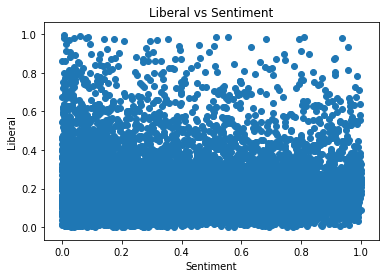

In [108]:
plt.scatter(sentiment, liberal)
plt.title('Liberal vs Sentiment')
plt.xlabel('Sentiment')
plt.ylabel('Liberal')
plt.show()




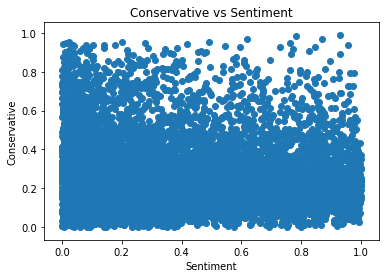

In [109]:
plt.scatter(sentiment, conservative)
plt.title('Conservative vs Sentiment')
plt.xlabel('Sentiment')
plt.ylabel('Conservative')
plt.show()


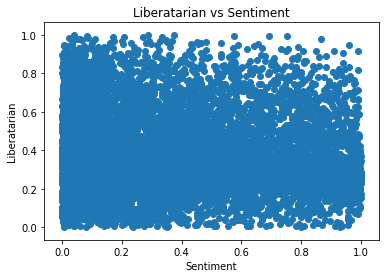

In [110]:
plt.scatter(sentiment, libertarian)
plt.title('Liberatarian vs Sentiment')
plt.xlabel('Sentiment')
plt.ylabel('Liberatarian')
plt.show()


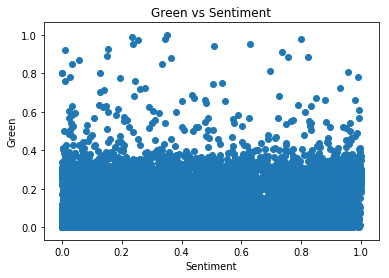

In [111]:
plt.scatter(sentiment, green)
plt.title('Green vs Sentiment')
plt.xlabel('Sentiment')
plt.ylabel('Green')
plt.show()


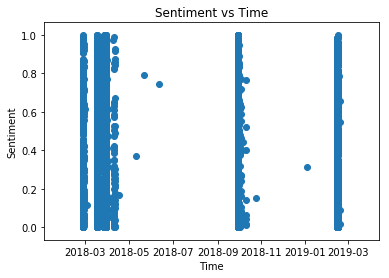

In [112]:
plt.scatter(time, sentiment)
plt.title('Sentiment vs Time')
plt.xlabel('Time')
plt.ylabel('Sentiment')
plt.show()

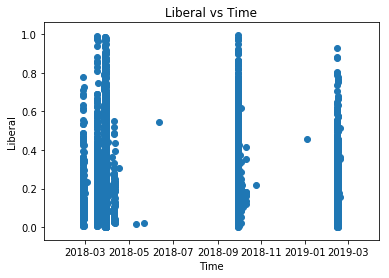

In [103]:
plt.scatter(time, liberal)
plt.title('Liberal vs Time')
plt.xlabel('Time')
plt.ylabel('Liberal')
plt.show()

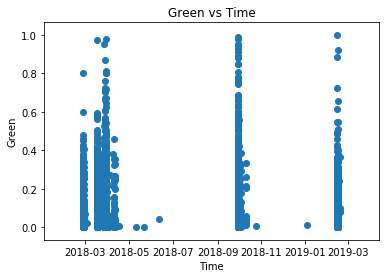

In [104]:
plt.scatter(time, green)
plt.title('Green vs Time')
plt.xlabel('Time')
plt.ylabel('Green')
plt.show()

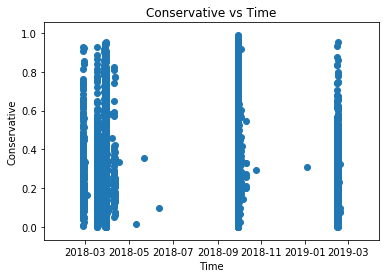

In [105]:
plt.scatter(time, conservative)
plt.title('Conservative vs Time')
plt.xlabel('Time')
plt.ylabel('Conservative')
plt.show()

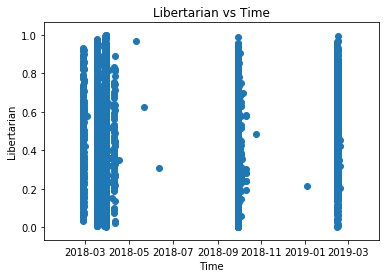

In [106]:
plt.scatter(time, libertarian)
plt.title('Libertarian vs Time')
plt.xlabel('Time')
plt.ylabel('Libertarian')

plt.show()